<a href="https://colab.research.google.com/github/ritamgh/DLT-lab/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


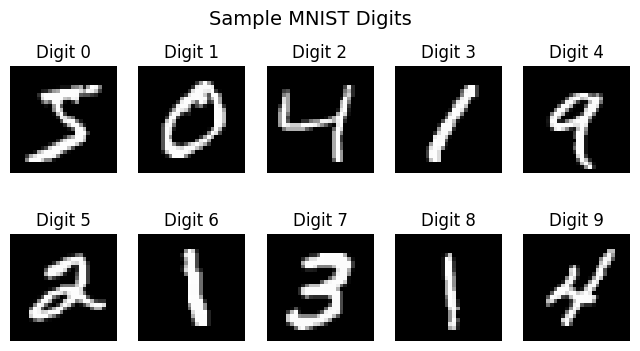

In [ ]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=14)
plt.show()


In [ ]:
# Normalize pixel values (0–255 -> 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten (28x28 -> 784)
x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))

print("After flattening:", x_train.shape, x_test.shape)


After flattening: (60000, 784) (10000, 784)


In [ ]:
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)  # compressed representation

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_img, decoded)

# Encoder model (for extracting compressed features)
encoder = Model(input_img, encoded)

# Compile
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=30,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.3199 - val_loss: 0.1399
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1316 - val_loss: 0.1104
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1091 - val_loss: 0.1009
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.1009 - val_loss: 0.0953
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0956 - val_loss: 0.0917
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0917 - val_loss: 0.0887
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0892 - val_loss: 0.0866
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0872 - val_loss: 0.0852
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0859 - val_loss: 0.0838
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0845 - val_loss: 0.0829
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0835 - val_loss: 0.0820
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

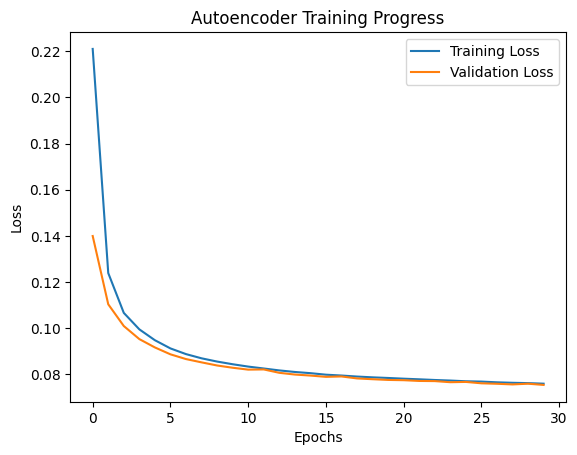

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Progress')
plt.legend()
plt.show()


In [ ]:
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Reconstruction Loss: {final_train_loss:.4f}")
print(f"Final Validation Reconstruction Loss: {final_val_loss:.4f}")


Final Training Reconstruction Loss: 0.0760
Final Validation Reconstruction Loss: 0.0754


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


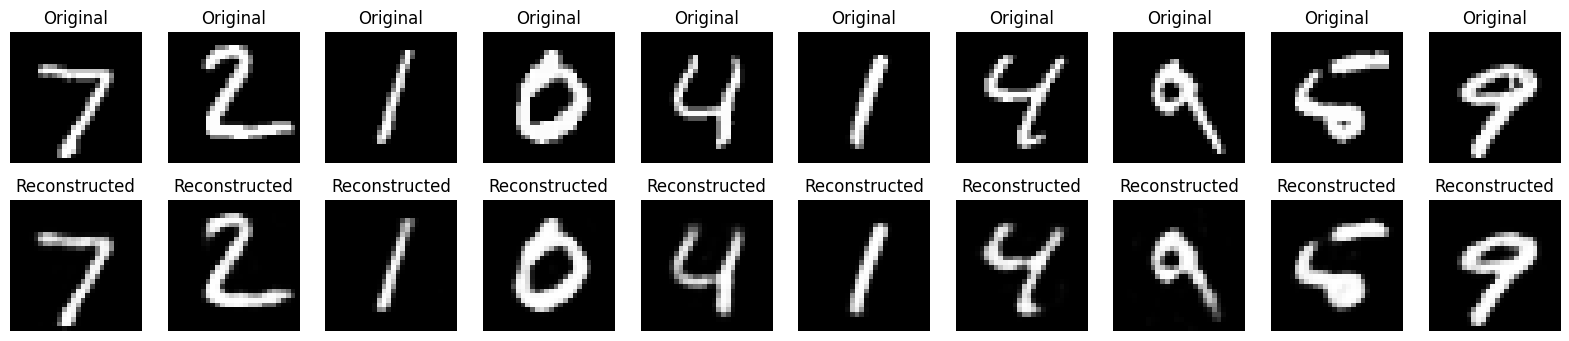

In [ ]:
# Reconstruct some test images
decoded_imgs = autoencoder.predict(x_test)

# Display original vs reconstructed
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
